# Usage example

In [1]:
import pyspatialstats.focal as fs
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
os.chdir('../../../')

Loading raster (containing water table depth (Fan et al., 2017)).

In [3]:
with rio.open('data/wtd.tif') as f:
    a = f.read(1).astype(np.float64)
    a[a == -999.9] = np.nan

Inspecting the data

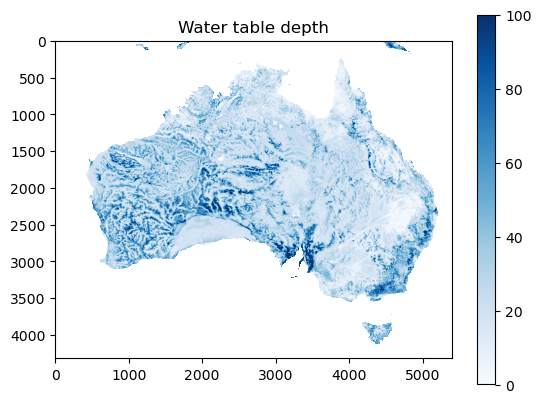

In [4]:
plt.imshow(a, cmap='Blues', vmax=100)
plt.title('Water table depth')
plt.colorbar()

## Focal statistics

Calculation of the focal mean:

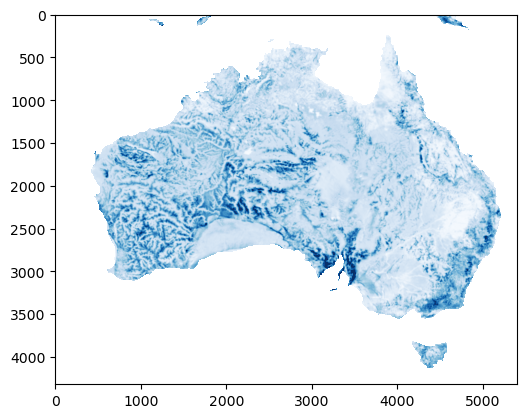

In [7]:
plt.imshow(fs.focal_mean(a, window=15).mean, vmax=100, cmap='Blues')

This looks quite similar to the input raster, but with smoothing applied. Let's try a higher window, which should increase the smoothing

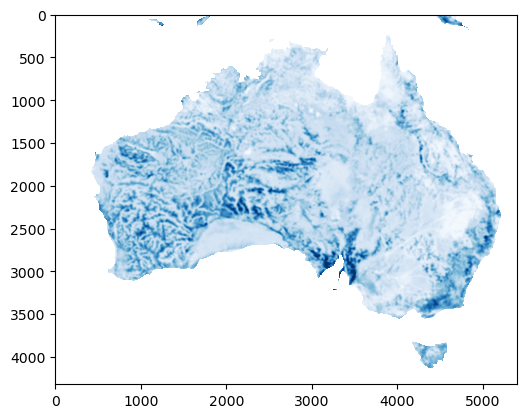

In [14]:
plt.imshow(fs.focal_mean(a, window=25).mean, vmax=100, cmap='Blues')

This same functionality can be used to reduce the shape of the raster based on this window.

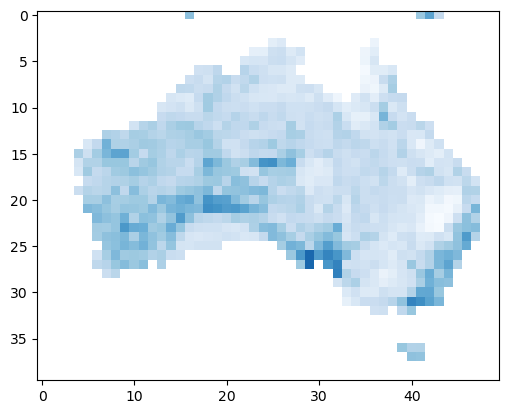

In [10]:
x = fs.focal_mean(a, window=108, reduce=True).mean
plt.imshow(x, vmax=100, cmap='Blues')

The shape of this new raster is exactly 108 times smaller than the input raster. Note that for this to work both x and y-axes need to be divisible by the window size.